In [5]:
%load_ext autoreload
%autoreload 2

# Setup Environment
import sys
import os
ROOT = '../../'
sys.path.append(ROOT)

import gym
from gym.spaces import Discrete
import numpy as np
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from IPython.display import HTML
from source.agents.dqn_agent import DQNAgent
from source import utils
from tqdm import tqdm
import torch
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


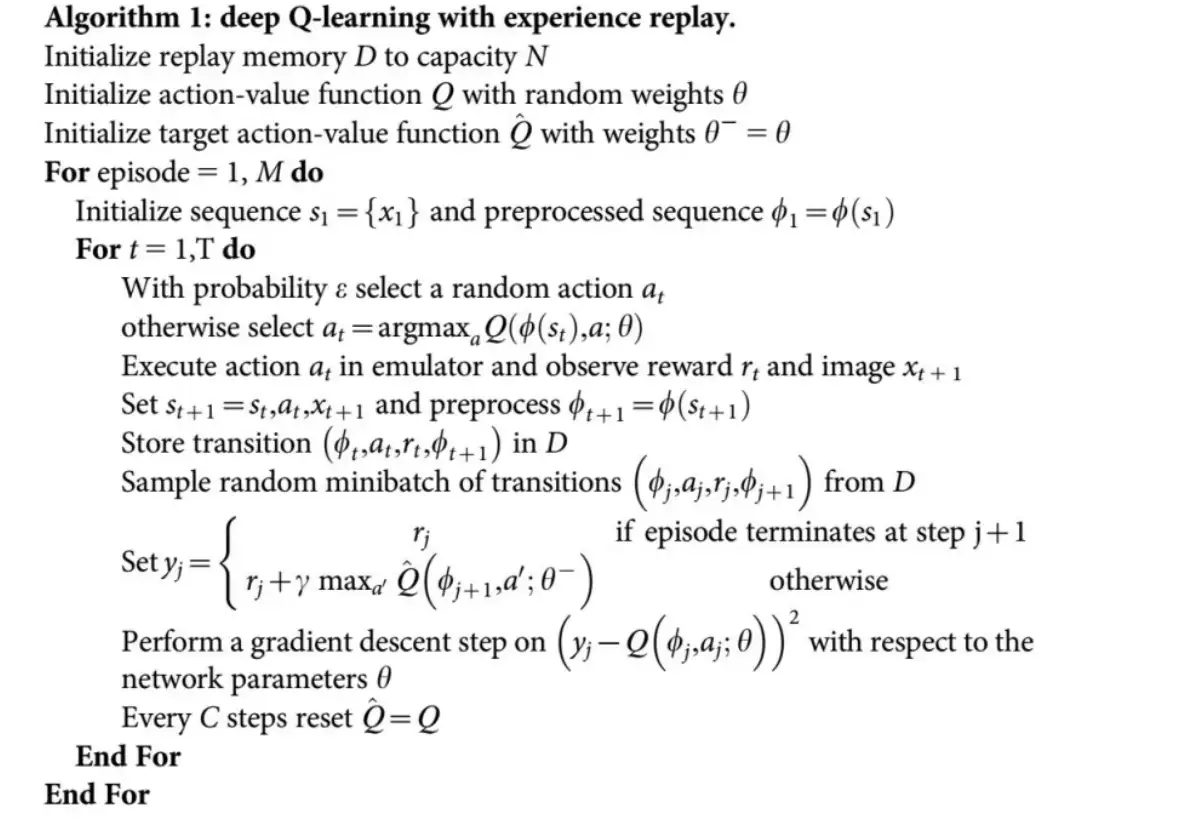

using device: cpu


100%|██████████| 100/100 [02:25<00:00,  1.45s/it]


step: 0, epsilon: 0.05, average_return: 56.65703202608942, success rate: 0.52


100%|██████████| 100/100 [01:06<00:00,  1.50it/s]


step: 1, epsilon: 0.05, average_return: 126.09895431458726, success rate: 0.87


100%|██████████| 100/100 [00:52<00:00,  1.92it/s]


step: 2, epsilon: 0.05, average_return: 144.1732551152154, success rate: 0.94


100%|██████████| 100/100 [00:56<00:00,  1.76it/s]


step: 3, epsilon: 0.05, average_return: 158.01889531881045, success rate: 0.92


100%|██████████| 100/100 [00:54<00:00,  1.82it/s]


step: 4, epsilon: 0.05, average_return: 176.41122294483858, success rate: 0.97


100%|██████████| 100/100 [00:47<00:00,  2.12it/s]


step: 5, epsilon: 0.05, average_return: 183.83559733490225, success rate: 0.98


100%|██████████| 100/100 [00:46<00:00,  2.15it/s]


step: 6, epsilon: 0.05, average_return: 186.9196519450828, success rate: 0.99


100%|██████████| 100/100 [00:57<00:00,  1.75it/s]


step: 7, epsilon: 0.05, average_return: 186.0602815918618, success rate: 0.95


100%|██████████| 100/100 [01:00<00:00,  1.65it/s]


step: 8, epsilon: 0.05, average_return: 191.9931137590072, success rate: 1.0


100%|██████████| 100/100 [00:46<00:00,  2.16it/s]


step: 9, epsilon: 0.05, average_return: 192.77631603614236, success rate: 0.98

rewarding episodes: 192776.31603614226


100%|██████████| 100/100 [00:05<00:00, 19.70it/s]


Average return = 173.92622821714096, Success rate = 0.99


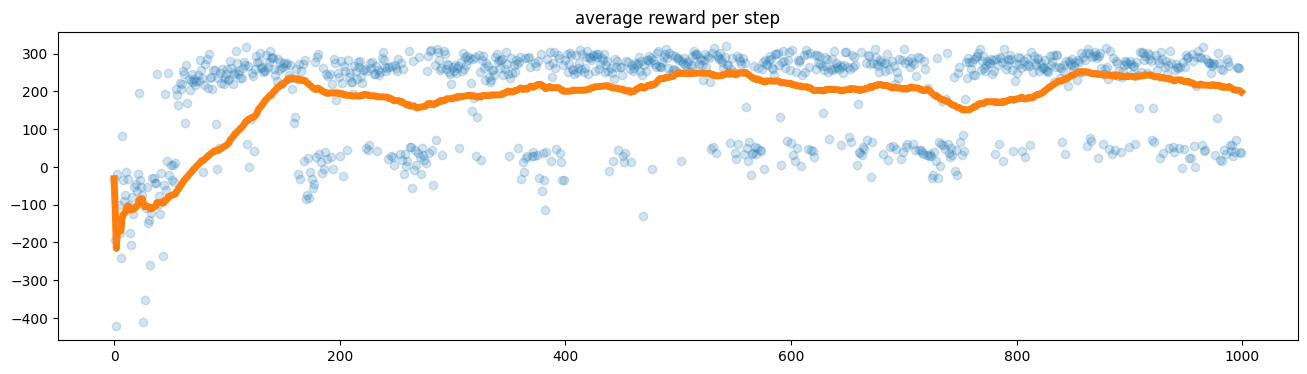

In [6]:
# Policy Eval
# Params
num_epoch = 10
num_episode = 100
video_path = os.path.join(ROOT, "video/dqn_lunar.mp4")
random_seed = 101

# Initialize
history = []
total_reward = 0
# set random seeds
rng = np.random.default_rng(random_seed)
#random.seed(random_seed)
np.random.seed(random_seed)
#torch.manual_seed(random_seed)
# epsilon decay
epsilon_schedule = utils.create_decay_schedule(num_epoch)
lr_schedule = utils.create_decay_schedule(num_epoch)

# Create Environment.
#env = gym.make('Taxi-v3')
# using render_mode=rgb_array so that video recording works
env = gym.make(
    "LunarLander-v2",
    render_mode='rgb_array'
)
#env = gym.make("CarRacing-v2", render_mode='rgb_array', continuous=False)
#env = gym.make("CartPole-v1", render_mode='rgb_array')
env.np_random = rng

# Create Agent
agent = DQNAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    discount_rate=0.99,
    epsilon=None, # use epsilon_schedule
    learning_rate=1e-3,
    batch_size = 128,
    tau = 0.005,
)
# Start Learning
for i in range(num_epoch):
    hisotry = []
    success = 0
    for _ in tqdm(range(num_episode)):
        reward, steps = agent.play_episode(env)#,epsilon=epsilon_schedule[i])
        if reward > 0:
            success += 1
        history.append(reward)
        total_reward += reward
    #score = agent.update()
    print(
        f"step: {i}, epsilon: {agent._epsilon}, average_return: {np.mean(history)}, success rate: {success / num_episode}")
print(f"\nrewarding episodes: {total_reward}")

# For off policy learning only: get greedy policy (no exploration)
#agent._policy = get_epsilon_greedy_policy_from_action_values(agent._Q.weight)
# Run Eval
avarge_return, success_rate = utils.evaluate_agent(agent, env, 100)
print(f"Average return = {avarge_return}, Success rate = {success_rate}")

# play last episode with video recording

utils.plot_history(history)


In [9]:
reward, _ = agent.play_episode(env, learning=False, video_path=video_path, epsilon=0.0)
print(video_path)
print(reward)
html=utils.render_mp4(video_path)
HTML(html)


Moviepy - Building video ../../video/dqn_lunar.mp4.
Moviepy - Writing video ../../video/dqn_lunar.mp4



Moviepy - Done !
Moviepy - video ready ../../video/dqn_lunar.mp4
../../video/dqn_lunar.mp4
251.0785037250139
